In [298]:
kmaz <- read.table("KMAZ.csv",header=TRUE,sep=';',row.names = 1)
head(kmaz)

,X.CLOSE.
,<dbl>
05.02.2020,66.7
06.02.2020,66.7
07.02.2020,67.1
10.02.2020,68.5
11.02.2020,68.2
12.02.2020,67.8


In [299]:
moex <- read.table("IMOEX.csv",header=TRUE,sep=';',row.names = 1)
head(moex)

,IMOEX
,<dbl>
05.02.2020,3114.25
06.02.2020,3096.68
07.02.2020,3087.63
10.02.2020,3062.41
11.02.2020,3097.58
12.02.2020,3122.27


In [300]:
library(PerformanceAnalytics)

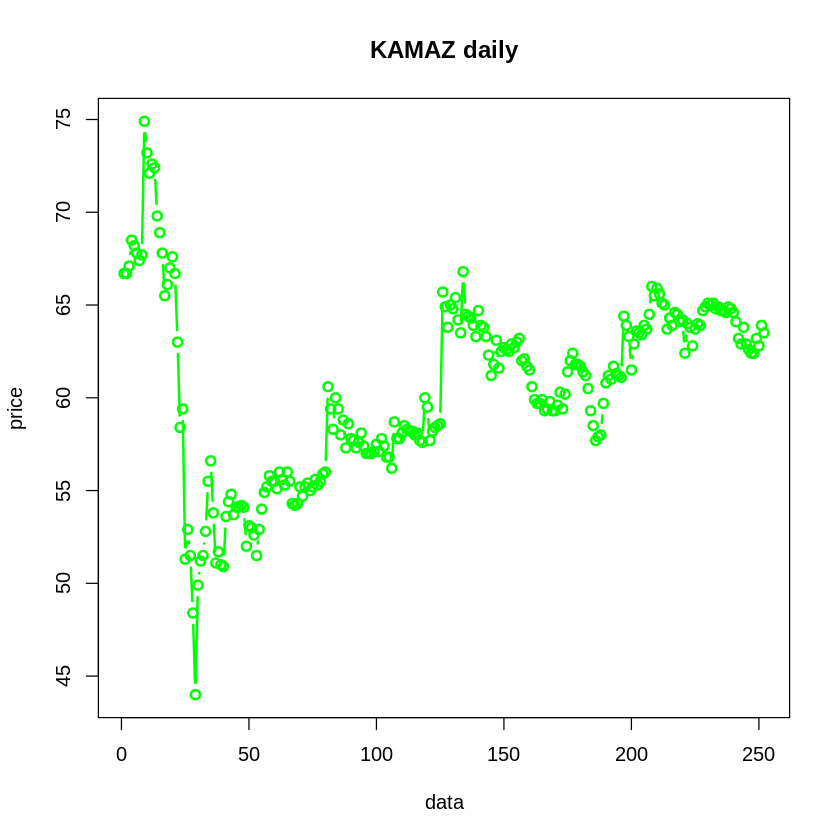

In [301]:
colnames(kmaz)<- c("KAMAZ")
plot(kmaz$KAMAZ,type = 'b',main="KAMAZ daily",pch = 21, col = "green",lwd = 2,xlab= 'data',ylab = "price" )

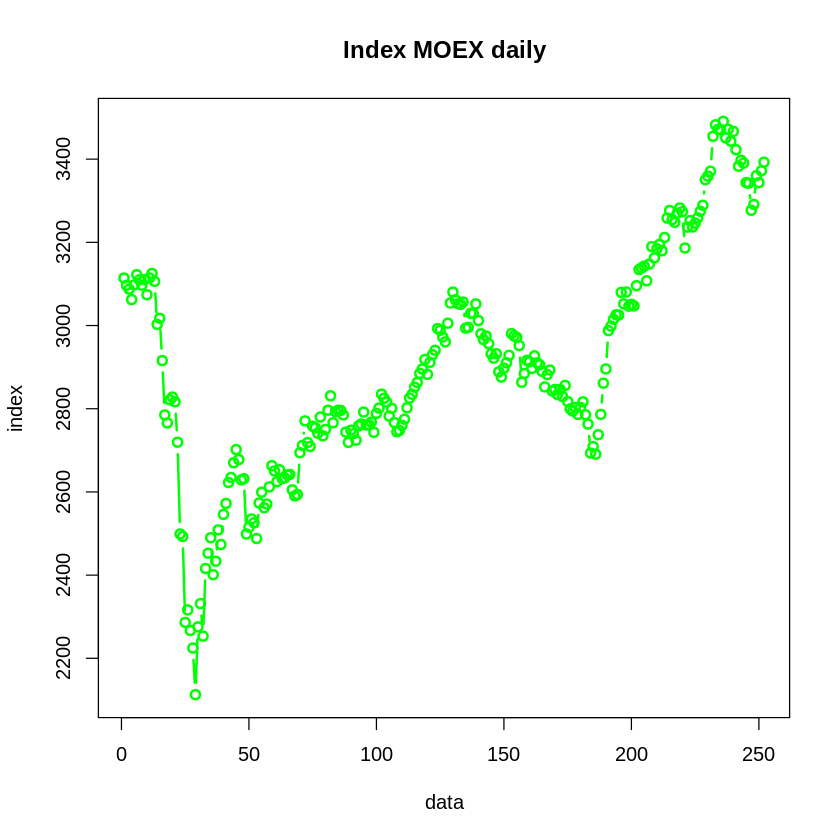

In [302]:
colnames(moex)<- c("IMOEX")
plot(moex$IMOEX,type = 'b',main="Index MOEX daily",pch = 21, col = "green",lwd = 2,xlab= 'data',ylab = "index" )

In [303]:
  Rf <-0.04


len<-  dim(kmaz)[1]
r1 <- diff(log(kmaz$KAMAZ))
r2 <- diff(log(moex$IMOEX))
rates <- cbind(r1,r2)


colnames(rates)<- c("KAMAZ","IMOEX")
rownames(rates)<-as.character(as.Date(rownames(kmaz)[2:len],"%d.%m.%Y"))
head(rates)

,KAMAZ,IMOEX
2020-02-06,0.000000000,-0.005657783
2020-02-07,0.005979091,-0.002926764
2020-02-10,0.020649701,-0.008201619
2020-02-11,-0.004389180,0.011418974
2020-02-12,-0.005882370,0.007939140
2020-02-13,-0.005917177,-0.003921498


Beta

In [304]:
#BETA MANUAL
beta_manual <- cov(rates[, "KAMAZ"],rates[, "IMOEX"])/ var(rates[, "IMOEX"])
beta_manual

[1] 0.8510664

In [305]:
#BETA
beta <- CAPM.beta(rates[, "KAMAZ"],rates[, "IMOEX"])
beta

[1] 0.8510664

Alpha

In [306]:
#ALPHA MANUAL

(alpha_manual <- mean(rates[, "KAMAZ"])-Rf- beta*(mean(rates[, "IMOEX"])- Rf))

[1] -0.006443621

In [307]:
#ALPHA

(alpha <- CAPM.alpha(rates[, "KAMAZ"],rates[, "IMOEX"],Rf = 0.04))

[1] -0.006443621

In [308]:
alpha_manual

[1] -0.006443621

Sharp

In [309]:
#Sharp manual

sharp <- mean(rates[, "KAMAZ"]-Rf)/sd(rates[, "KAMAZ"]-Rf)
sharp

[1] -1.661329

In [310]:
#Sharp

SharpeRatio(rates[, "KAMAZ"], Rf = Rf, p = 0.95, FUN = c("StdDev"))

"StdDev Sharpe (Rf=4%, p=95%):",-1.661329


Normal VAR *alpha* = 0.95

In [311]:
# !!!!!!!!!!!!!! здесь логнормальный VaR, а не нормальный
dif <- diff(log(kmaz[,"KAMAZ"]))
mean_dif <- mean(dif)

vol <- sd(dif)
vol

[1] 0.02419501

In [312]:
mean_dif

[1] -0.0001958767

In [313]:
alpha = 0.95
(VAR1 = qnorm(1-alpha,mean=mean_dif,sd=1)*vol)

[1] -0.03980198

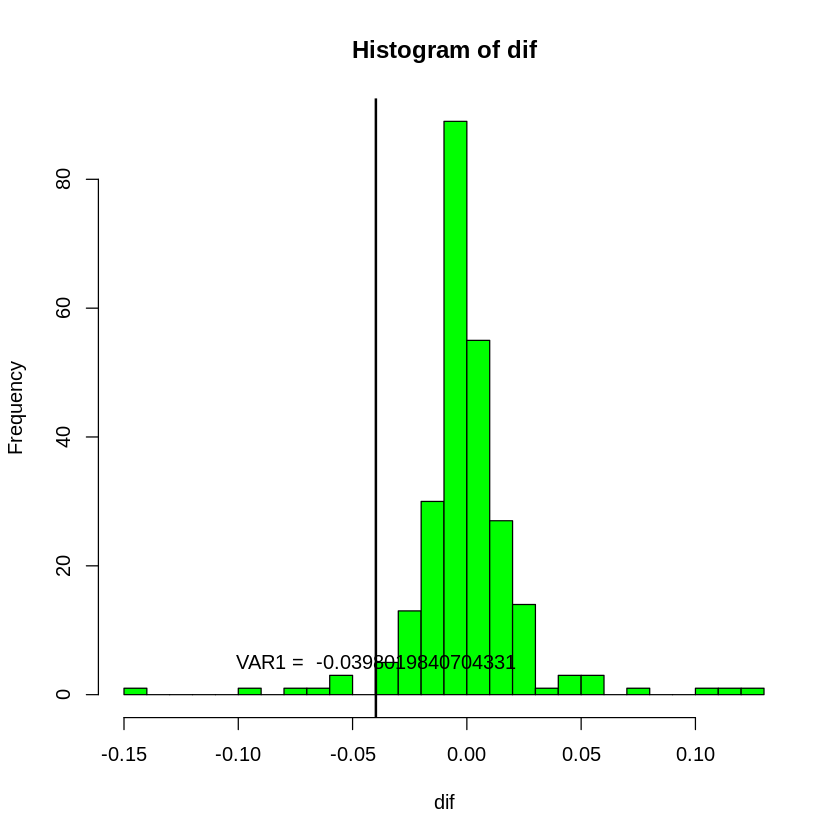

In [314]:
hist(dif,col = "green",nclass = 20)
abline(v = VAR1,lwd = 2)
text(VAR1,5,paste("VAR1 = ",VAR1))

In [315]:
norm_var <- VAR1

Historical VAR *alpha* = 0.95

In [316]:
data_dif <- as.xts(dif,as.Date(rownames(kmaz)[2:len],"%d.%m.%Y"))

In [317]:
head(data_dif)

                   [,1]
2020-02-06  0.000000000
2020-02-07  0.005979091
2020-02-10  0.020649701
2020-02-11 -0.004389180
2020-02-12 -0.005882370
2020-02-13 -0.005917177

In [318]:
(VaR(data_dif, p=.95, method="historical"))

VaR,-0.02864304


In [319]:
  (-1*quantile(data_dif,c(.05,.95)))

5%         95% 
 0.02864304 -0.02778200

In [320]:
hist_var <- (-1*quantile(data_dif,c(.05,.95)))[1]*(-1)
hist_var

5% 
-0.02864304

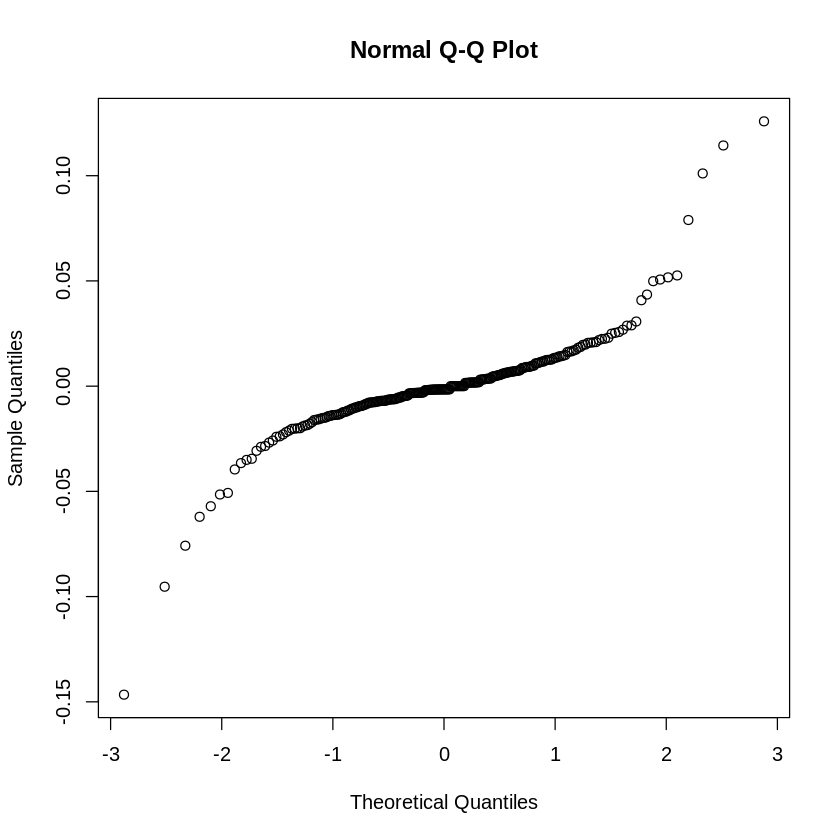

In [321]:
qqnorm(dif)

Historical Shortfall

In [322]:
ES(rates, p=.95, method="historical")

,KAMAZ,IMOEX
ES,-0.0572607,-0.04438307


In [323]:
shortfall_hist <- ES(rates, p=.95, method="historical")[,1]
shortfall_hist

[1] -0.0572607

Gaussian Shortfall

In [324]:
ES(rates, p=.95, method="gaussian")


,KAMAZ,IMOEX
ES,-0.05000371,-0.03396377


In [325]:
shortfall_gauss <- ES(rates, p=.95, method="gaussian")[,1]
shortfall_gauss

[1] -0.05000371

In [326]:
res <- list(
  beta = beta,
    alpha = alpha_manual,
    sharp=sharp,
    var_hist = hist_var,
    var_gauss= norm_var,
    shortfall_gauss=shortfall_gauss,
    shortfall_hist=shortfall_hist
)
res

$beta
[1] 0.8510664

$alpha
[1] -0.006443621

$sharp
[1] -1.661329

$var_hist
         5% 
-0.02864304 

$var_gauss
[1] -0.03980198

$shortfall_gauss
[1] -0.05000371

$shortfall_hist
[1] -0.0572607

In [327]:
res <- list(
  beta = beta,
    alpha = alpha_manual,
    sharp=sharp,
    var_hist = hist_var,
    var_gauss= norm_var,
    shortfall_gauss=shortfall_gauss,
    shortfall_hist=shortfall_hist
)
res

$beta
[1] 0.8510664

$alpha
[1] -0.006443621

$sharp
[1] -1.661329

$var_hist
         5% 
-0.02864304 

$var_gauss
[1] -0.03980198

$shortfall_gauss
[1] -0.05000371

$shortfall_hist
[1] -0.0572607